### Stable Diffusion 2.1 image generation
Using Hugging Face diffusers library: https://huggingface.co/stabilityai/stable-diffusion-2-1

In [2]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler, StableDiffusionUpscalePipeline
from PIL import Image
import os

os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:512"
torch.cuda.empty_cache() #free GPU memory


/home/harrison/Documents/python/AI/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Check if GPU is present and available, or if CPU is being used
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

# Print details if GPU is detected
current_device = torch.cuda.current_device()
print(torch.cuda.device(current_device))
print(torch.cuda.get_device_name(current_device))

/home/harrison/Documents/python/AI/lib/python3.10/site-packages/torch/cuda/__init__.py:118: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


Using device: cpu


RuntimeError: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero.

### Helpers

In [ ]:
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [ ]:
# Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
model_id = "stabilityai/stable-diffusion-2-1"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")


In [ ]:
orig_prompt = 'A photo of an astronaut riding a horse on mars.'
adv1 = 'A photo of an astornaut riding a hrose on mars.' #typo
adv2 = 'A photo of an astrοnaut riding a hοrse on mars.' #glyph
adv3 = 'A photo of an astronaut riding a holse on mars.' #phonetic

prompt = [orig_prompt, adv1, adv2, adv3]
n_images = len(prompt)

In [ ]:
prompt

In [8]:
# Define prompt
filename = 'astronaut_horse_0'
seed = ""
# prompt = f'cinematic photo of {seed}, 35mm photograph, film, professional, 4k, highly detailed'


### Loop and Save images

In [ ]:
dir_root = f'./images/sd_2-1/{filename}'
if not os.path.exists(dir_root): 
      
    # if the directory is not present then create it. 
    os.makedirs(f'./images/sd_2-1/{filename}') 

In [ ]:
# Generate images
for i, pr in enumerate(prompt):
    image = pipe(pr).images[0]
    image.save(f'{dir_root}/{filename}_{i}.png')

In [11]:
# Get image from file
def get_images(path, num_images=1):
    images = []
    for i in range(0, num_images):
    img = Image.open(path).convert('RGB')
    return img

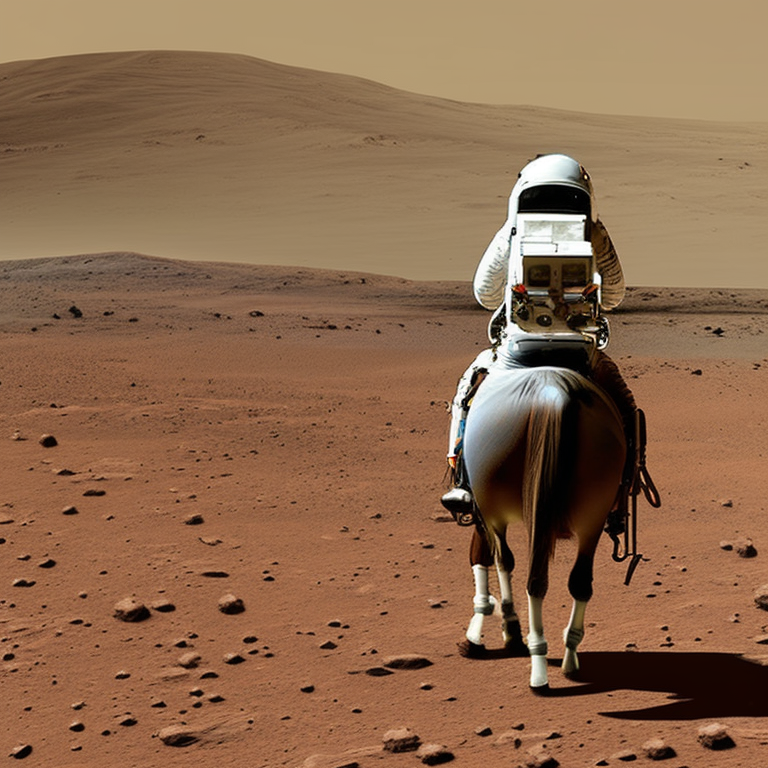

In [9]:
# Render loaded image
img_num = 0
url = f'./images/sd_2-1/{filename}/{filename}_{img_num}.png'
low_res_img = get_image(url)
low_res_img

In [10]:
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [ ]:
num_images = 3
img = get_images(url, num_images=num_images)

grid = image_grid()